In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
def fa(x=1,y=1,**kwargs):
    fig,ax = plt.subplots(x,y,**kwargs)
    return fig,ax
%matplotlib notebook
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, optimizers

from tqdm import tqdm
import time
import collections
import pandas as pd

def plot_dataset(x,y,**kwargs):
    plt.scatter(x,y,alpha=0.3,marker='.',**kwargs)

    
def two_hidden_layer(data, labels,activation,N_HIDDEN=1):
    INPUT_SHAPE = (data.shape[1],)
    NB_CLASSES     = np.unique(labels).shape[0]
    print(f"Building Network with 2 hidden layers alike")
    print(f"Found {NB_CLASSES} classes")
    print(f"Found {INPUT_SHAPE} input size")
    model = models.Sequential()
    
    model.add(keras.layers.Dense(N_HIDDEN,input_shape=INPUT_SHAPE,name='dense_layer', activation='relu'))
    model.add(keras.layers.Dense(N_HIDDEN,name='dense_layer_2', activation='relu'))
    model.add(keras.layers.Dense(NB_CLASSES,name='linear', activation=activation))    
    return model

def logistic(data, labels,activation):
    INPUT_SHAPE    = (data.shape[1],)
    NB_CLASSES     = np.unique(labels).shape[0]
    print(f"Building model Logistic Network alike")
    print(f"Found {NB_CLASSES} classes")
    print(f"Found {INPUT_SHAPE} input size")
    model = models.Sequential()
    
    model.add(keras.layers.Dense(NB_CLASSES,
                                 input_shape=INPUT_SHAPE,
                                 name='dense_layer', 
                                 activation=activation))
    
    return model


### Linear Classifier

(3000, 2)
(3000,)


<IPython.core.display.Javascript object>


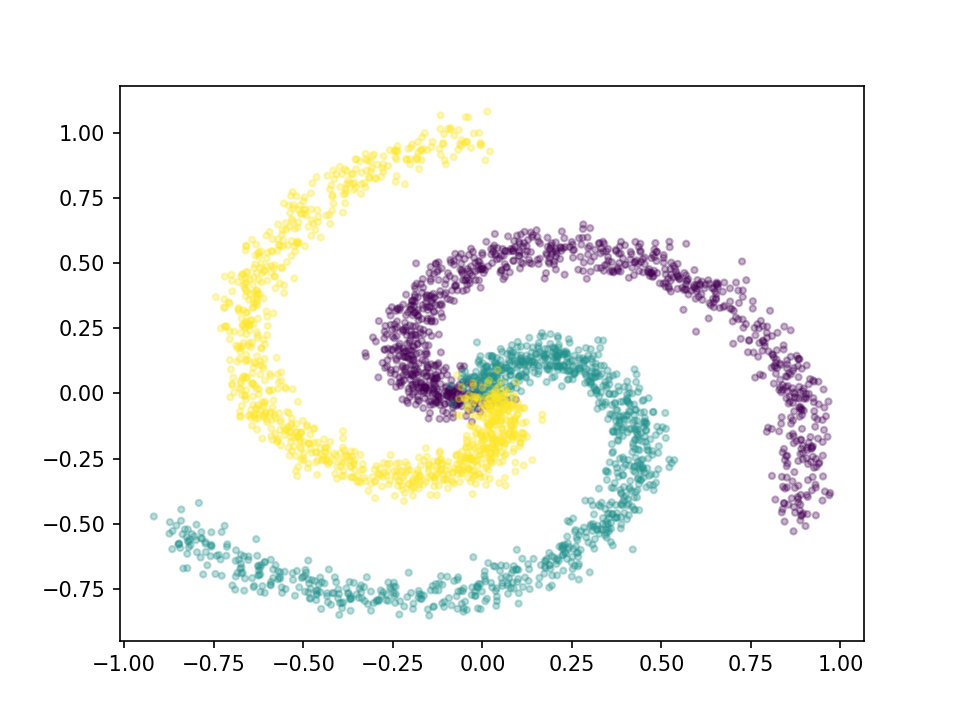

In [6]:
def data_fun(N=1000,noise=.04):
    T_C = 3 #number of categories
    Y = np.tile(np.arange(T_C),(N,1)).ravel(order='F')
    t = np.random.rand(N*T_C)
    X = np.c_[t*(np.sin( (2*np.pi/T_C)*(2*t+Y-1))),t*(np.cos( (2*np.pi/T_C)*(2*t+Y-1) ))]
    X = X + np.random.randn(N*T_C,2)*noise
    return {'X':X,'y':Y}
data = data_fun()
print(data['X'].shape)
print(data['y'].shape)
f,a= fa()
a.scatter(data['X'][:,0],data['X'][:,1],c=data['y'],alpha=0.3,marker='.')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['X'],data['y'], 
                                                    test_size=0.33, 
                                                    random_state=42)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train))

(2010, 2)
(2010,)
[0 1 2]


Epoch 1/200


2022-05-30 22:19:50.594457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


19/19 [==============================] - 0s 8ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 4/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 8/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 9/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 10/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 11/200
19/19 [=

19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 84/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 85/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 86/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 87/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 88/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 89/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 90/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 91/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 92/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 93/200


19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 165/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 166/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 167/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 168/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 169/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 170/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 171/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 172/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoch 173/200
19/19 [==============================] - 0s 2ms/step - loss: 0.6672 - val_loss: 0.6219
Epoc

<IPython.core.display.Javascript object>


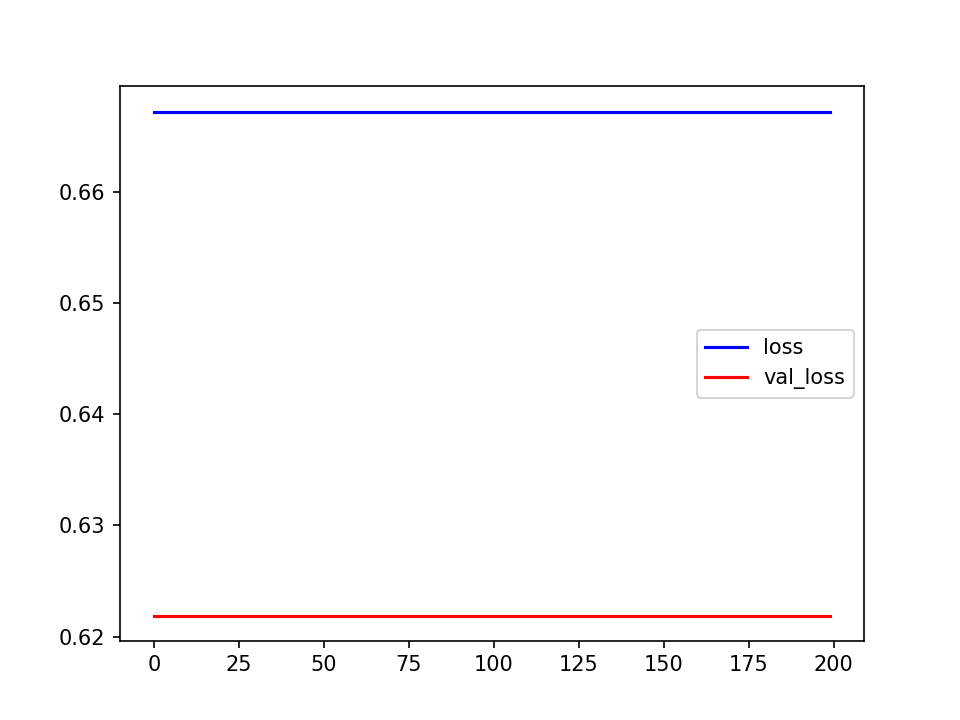

<IPython.core.display.Javascript object>


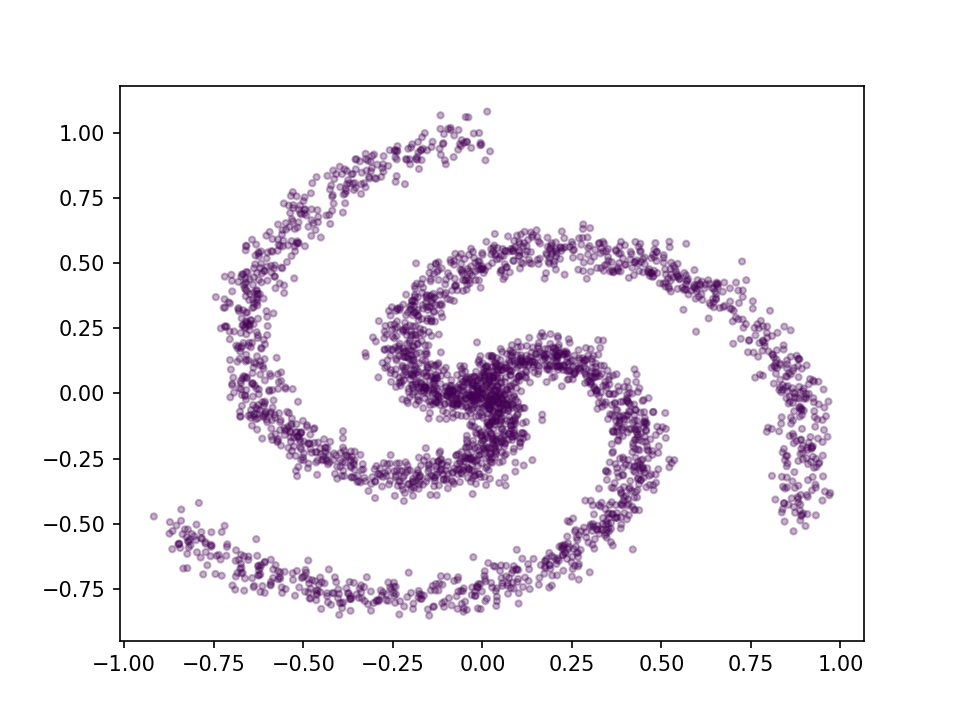

94/94 [==============================] - 0s 777us/step


In [8]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.InputLayer(input_shape=(2,)),
                    tf.keras.layers.Dense(3, activation='relu'),
                    tf.keras.layers.Dense(1, activation=tf.nn.softmax)
                                    ])
optimizer = tf.keras.optimizers.SGD()
model.compile(loss='mse',optimizer=optimizer)
H = model.fit(X_train,y_train,
          batch_size=100,
          epochs=200,
          verbose=True,
          validation_split=0.1)

f,a= fa()
a.plot(H.epoch,H.history["loss"],'b')
a.plot(H.epoch,H.history["val_loss"],'r')
a.legend(['loss','val_loss'])

f,a = fa()
a.scatter(data['X'][:,0],data['X'][:,1],c=model.predict(data['X']),alpha=0.3,marker='.')

In [ ]:
# Note how the loss functions do not move one inch.